In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
# Load the dataset (replace 'winequality.csv' with the actual path to your dataset)
data = pd.read_csv('C:\Oasis Intern\WineQT.csv')

# Display the first few rows of the dataset
print(data.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000         

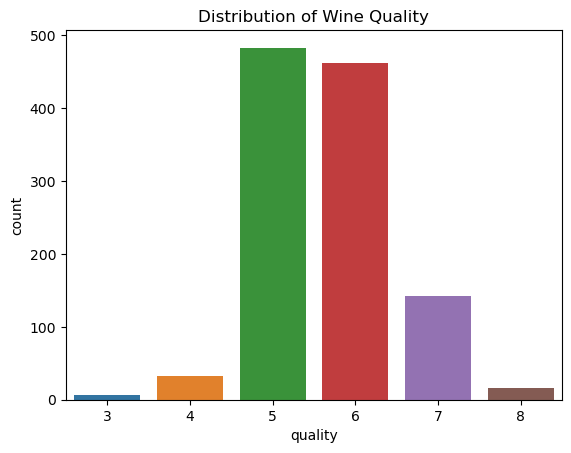

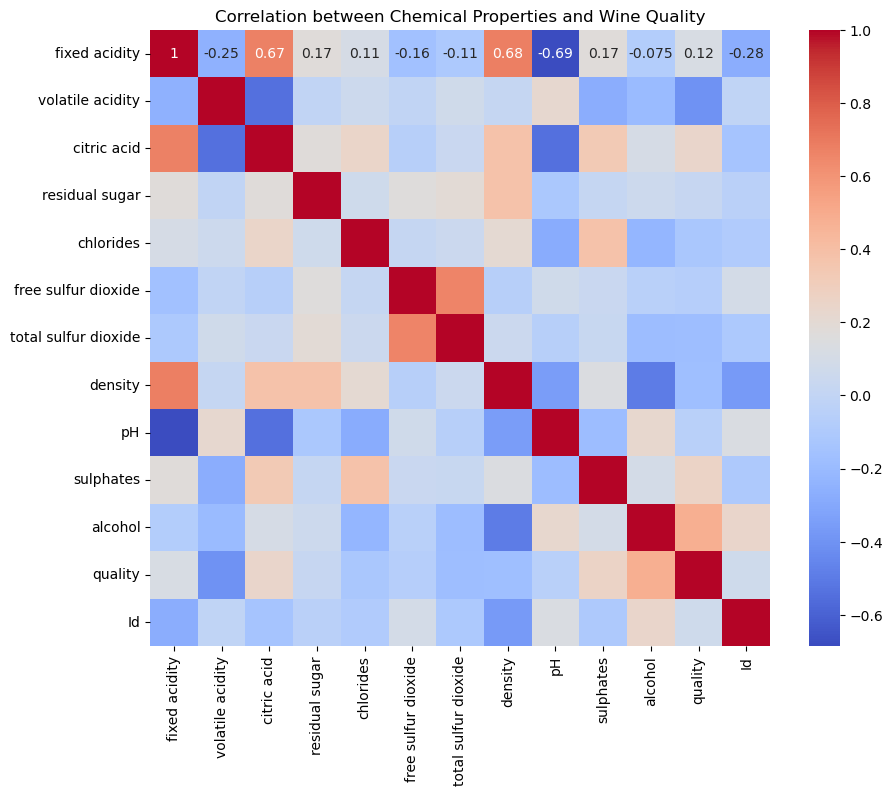

In [7]:
# Basic statistics of the dataset
print(data.describe())

# Checking for missing values
print(data.isnull().sum())

# Visualizing the distribution of wine quality
sns.countplot(x='quality', data=data)
plt.title('Distribution of Wine Quality')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Chemical Properties and Wine Quality')
plt.show()


In [9]:
# Defining features and target variable
X = data.drop('quality', axis=1)
y = data['quality']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# Initializing and training the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicting on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluating the model
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions,zero_division=0))
print(confusion_matrix(y_test, rf_predictions))


Random Forest Accuracy: 0.6812227074235808
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.73      0.75      0.74        96
           6       0.63      0.70      0.66        99
           7       0.75      0.58      0.65        26
           8       0.00      0.00      0.00         2

    accuracy                           0.68       229
   macro avg       0.42      0.40      0.41       229
weighted avg       0.66      0.68      0.67       229

[[ 0  3  3  0  0]
 [ 0 72 24  0  0]
 [ 0 24 69  5  1]
 [ 0  0 11 15  0]
 [ 0  0  2  0  0]]


In [21]:
# Initializing and training the SGD model
sgd_model = SGDClassifier(random_state=42)
sgd_model.fit(X_train, y_train)

# Predicting on the test set
sgd_predictions = sgd_model.predict(X_test)

# Evaluating the model
print("SGD Classifier Accuracy:", accuracy_score(y_test, sgd_predictions))
print(classification_report(y_test, sgd_predictions,zero_division=0))
print(confusion_matrix(y_test, sgd_predictions))


SGD Classifier Accuracy: 0.5327510917030568
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.74      0.33      0.46        96
           6       0.48      0.91      0.63        99
           7       0.00      0.00      0.00        26
           8       0.00      0.00      0.00         2

    accuracy                           0.53       229
   macro avg       0.25      0.25      0.22       229
weighted avg       0.52      0.53      0.47       229

[[ 0  1  5  0  0]
 [ 0 32 64  0  0]
 [ 0  9 90  0  0]
 [ 0  1 25  0  0]
 [ 0  0  2  0  0]]


In [23]:
# Initializing and training the SVC model
svc_model = SVC(random_state=42)
svc_model.fit(X_train, y_train)

# Predicting on the test set
svc_predictions = svc_model.predict(X_test)

# Evaluating the model
print("SVC Accuracy:", accuracy_score(y_test, svc_predictions))
print(classification_report(y_test, svc_predictions,zero_division=0))
print(confusion_matrix(y_test, svc_predictions))


SVC Accuracy: 0.49344978165938863
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.49      0.64      0.55        96
           6       0.50      0.53      0.51        99
           7       0.00      0.00      0.00        26
           8       0.00      0.00      0.00         2

    accuracy                           0.49       229
   macro avg       0.20      0.23      0.21       229
weighted avg       0.42      0.49      0.45       229

[[ 0  2  4  0  0]
 [ 0 61 35  0  0]
 [ 0 47 52  0  0]
 [ 0 14 12  0  0]
 [ 0  1  1  0  0]]


Random Forest Accuracy: 0.6812227074235808
SGD Classifier Accuracy: 0.5327510917030568
SVC Accuracy: 0.49344978165938863


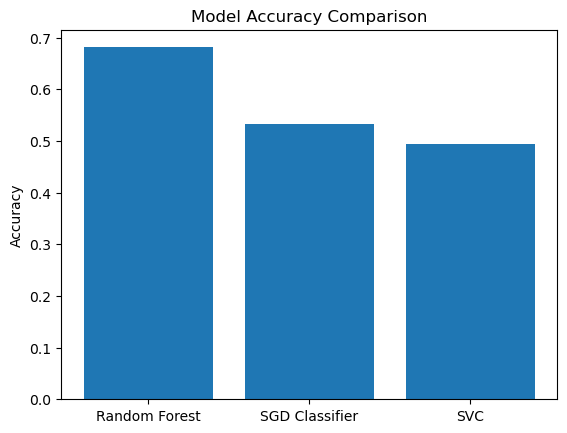

In [17]:
# Compare accuracy scores
rf_acc = accuracy_score(y_test, rf_predictions)
sgd_acc = accuracy_score(y_test, sgd_predictions)
svc_acc = accuracy_score(y_test, svc_predictions)

print(f"Random Forest Accuracy: {rf_acc}")
print(f"SGD Classifier Accuracy: {sgd_acc}")
print(f"SVC Accuracy: {svc_acc}")

# You can visualize the comparison with a bar plot
model_accuracies = {'Random Forest': rf_acc, 'SGD Classifier': sgd_acc, 'SVC': svc_acc}
plt.bar(model_accuracies.keys(), model_accuracies.values())
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()
